# Predicting Loan Payback using Logistic Regression


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
df = pd.read_csv("/content/loan_dataset_20000.csv")

In [39]:
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [40]:
# Checking which columns are skewed
# If the mean is much higher or lower than the median (50%), it indicates an asymmetric distribution.
# Also, if the maximum value is much higher than the 75% quantile,
# it is a clear sign of a right-skewed distribution.

df.describe()

,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.027000,43549.637765,3629.136466,0.177019,679.25695,15129.300909,12.400627,43.22280,455.625794,5.011800,48649.824769,24333.394631,1.990150,0.061800,2.489150,0.799900
std,15.829352,28668.579671,2389.048326,0.105059,69.63858,8605.405513,2.442729,11.00838,274.622125,2.244529,32423.378128,22313.845395,1.474945,0.285105,1.631384,0.400085
min,21.000000,6000.000000,500.000000,0.010000,373.00000,500.000000,3.140000,36.00000,9.430000,0.000000,6157.800000,496.350000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,24260.752500,2021.730000,0.096000,632.00000,8852.695000,10.740000,36.00000,253.910000,3.000000,27180.492500,9592.572500,1.000000,0.000000,1.000000,1.000000
50%,48.000000,36585.260000,3048.770000,0.160000,680.00000,14946.170000,12.400000,36.00000,435.595000,5.000000,40241.615000,18334.555000,2.000000,0.000000,2.000000,1.000000
75%,62.000000,54677.917500,4556.495000,0.241000,727.00000,20998.867500,14.002500,60.00000,633.595000,6.000000,60361.257500,31743.327500,3.000000,0.000000,3.000000,1.000000
max,75.000000,400000.000000,33333.330000,0.667000,850.00000,49039.690000,22.510000,60.00000,1685.400000,15.000000,454394.190000,352177.900000,11.000000,2.000000,11.000000,1.000000


In [41]:
# Checking whether the dataset is balanced or imbalanced

df["loan_paid_back"].value_counts()

,count
loan_paid_back,
1,15998
0,4002


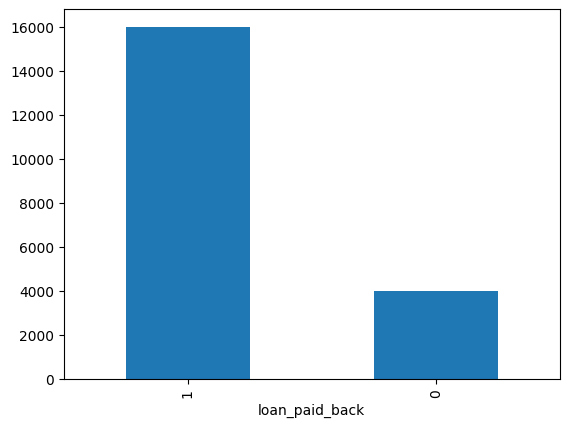

In [42]:
df['loan_paid_back'].value_counts().plot.bar()
plt.show()

In [43]:
# Checking for missing values in the dataset

df.isnull().sum()

,0
age,0
gender,0
marital_status,0
education_level,0
annual_income,0
monthly_income,0
employment_status,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0


In [44]:
# Dropping columns that contain redundant information already captured in other features

df = df.drop(["monthly_income", "installment", "grade_subgrade"], axis=1)

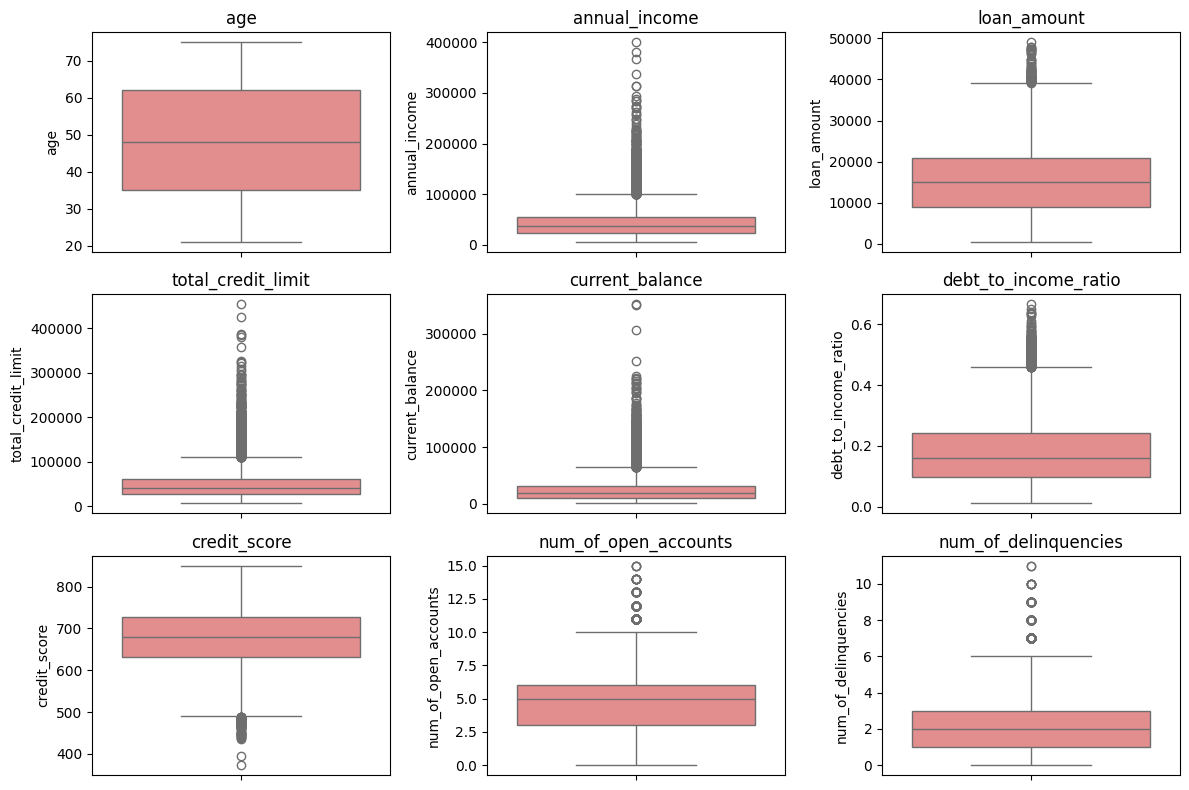

In [45]:
# This code performs a visual analysis of numerical features using boxplots
# in order to detect the presence of outliers in the raw data.
# Data points that appear above or below the whiskers are considered outliers.
# The analysis shows that outliers are present in all numerical columns
# except for the 'age' feature, which does not contain extreme values.

num_cols = ["age", "annual_income", "loan_amount", "total_credit_limit",
            "current_balance", "debt_to_income_ratio", "credit_score",
            "num_of_open_accounts", "num_of_delinquencies"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()


In [46]:
# Apply log transformation to skewed columns to reduce right skewness
# This helps to make the distribution more symmetric and can improve model performance

skewed_cols = ["annual_income", "loan_amount", "total_credit_limit", "current_balance"]
for col in skewed_cols:
    df[col] = np.log1p(df[col])

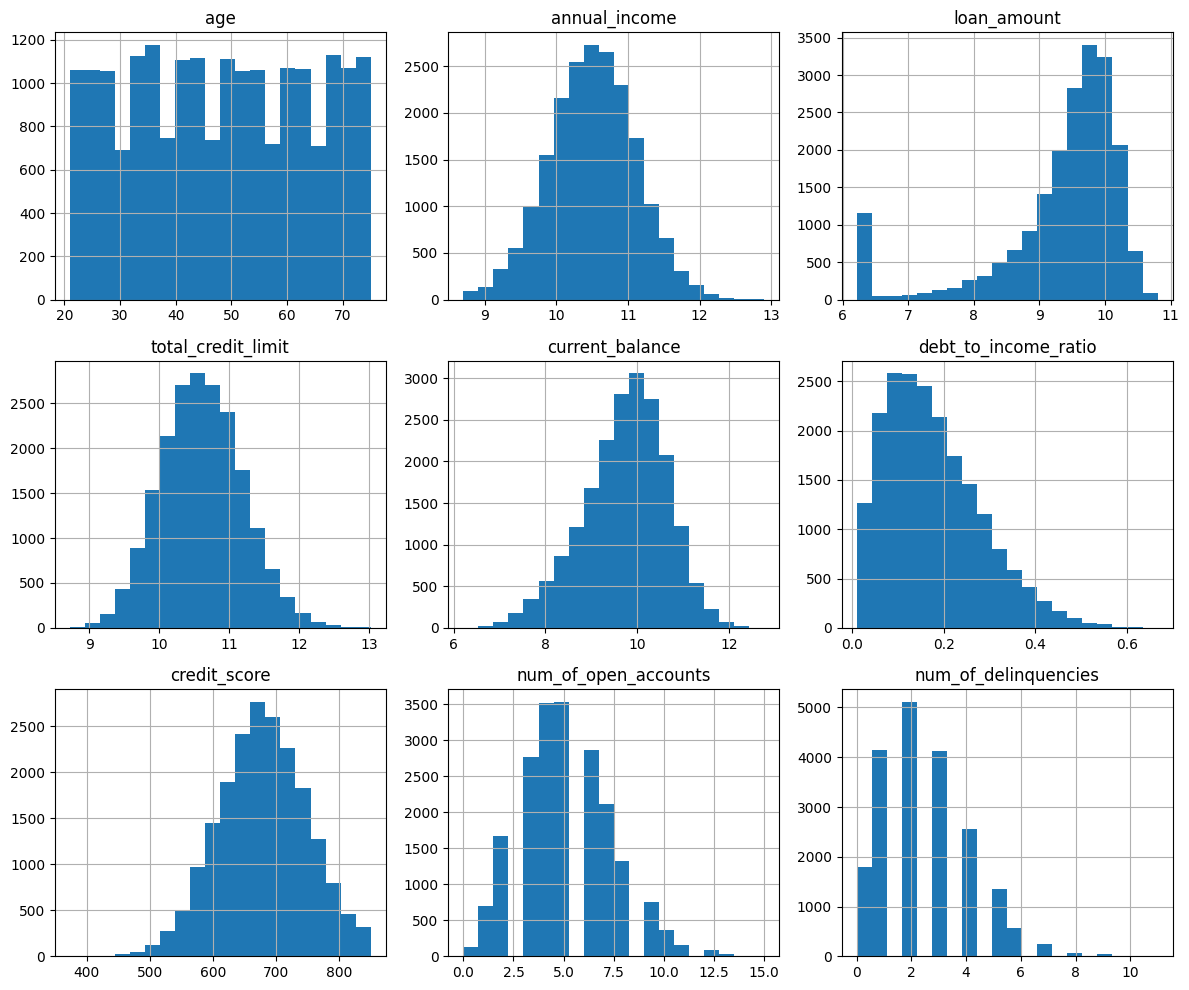

In [47]:
# Visualize the distribution of numerical features to check for skewness and potential outliers

num_cols = ["age", "annual_income", "loan_amount", "total_credit_limit", "current_balance",
            "debt_to_income_ratio", "credit_score", "num_of_open_accounts", "num_of_delinquencies"]
df[num_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [48]:
# Convert categorical columns into numerical format using one-hot encoding

cat_cols = ["gender", "marital_status", "education_level", "employment_status", "loan_purpose"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [49]:
X = df.drop("loan_paid_back", axis=1)
y = df["loan_paid_back"]

In [51]:
# Split the data into training, validation, and test sets
# First, separate 20% for the test set, keeping 80% for training/validation
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the remaining 80% into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [53]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [54]:
#VALIDATION
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.888

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67       789
           1       0.90      0.97      0.93      3211

    accuracy                           0.89      4000
   macro avg       0.85      0.77      0.80      4000
weighted avg       0.88      0.89      0.88      4000



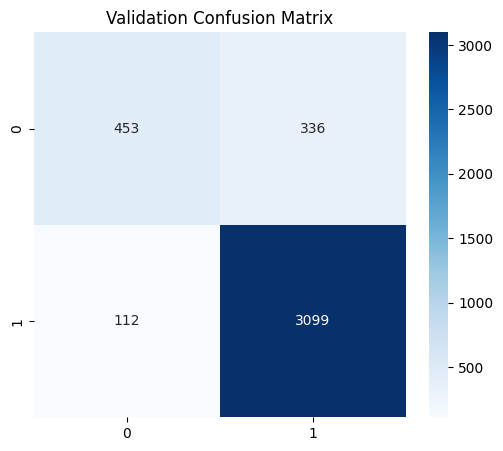

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

In [56]:
#FINAL TEST EVALUATION
y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.87925

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66       818
           1       0.90      0.96      0.93      3182

    accuracy                           0.88      4000
   macro avg       0.84      0.76      0.79      4000
weighted avg       0.87      0.88      0.87      4000



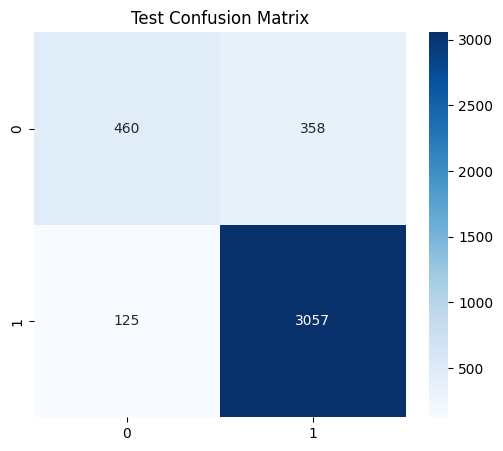

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.show()

The Logistic Regression model achieves good overall accuracy (~89%) on both validation and test sets.
However, the dataset is imbalanced: there are more loans paid back (1) than not paid back (0), so the model predicts the majority class better than the minority class.